Loading and visualizing: ../../outputs/slices/DrivAer_F_D_WM_WW_0001_axis-x.npy


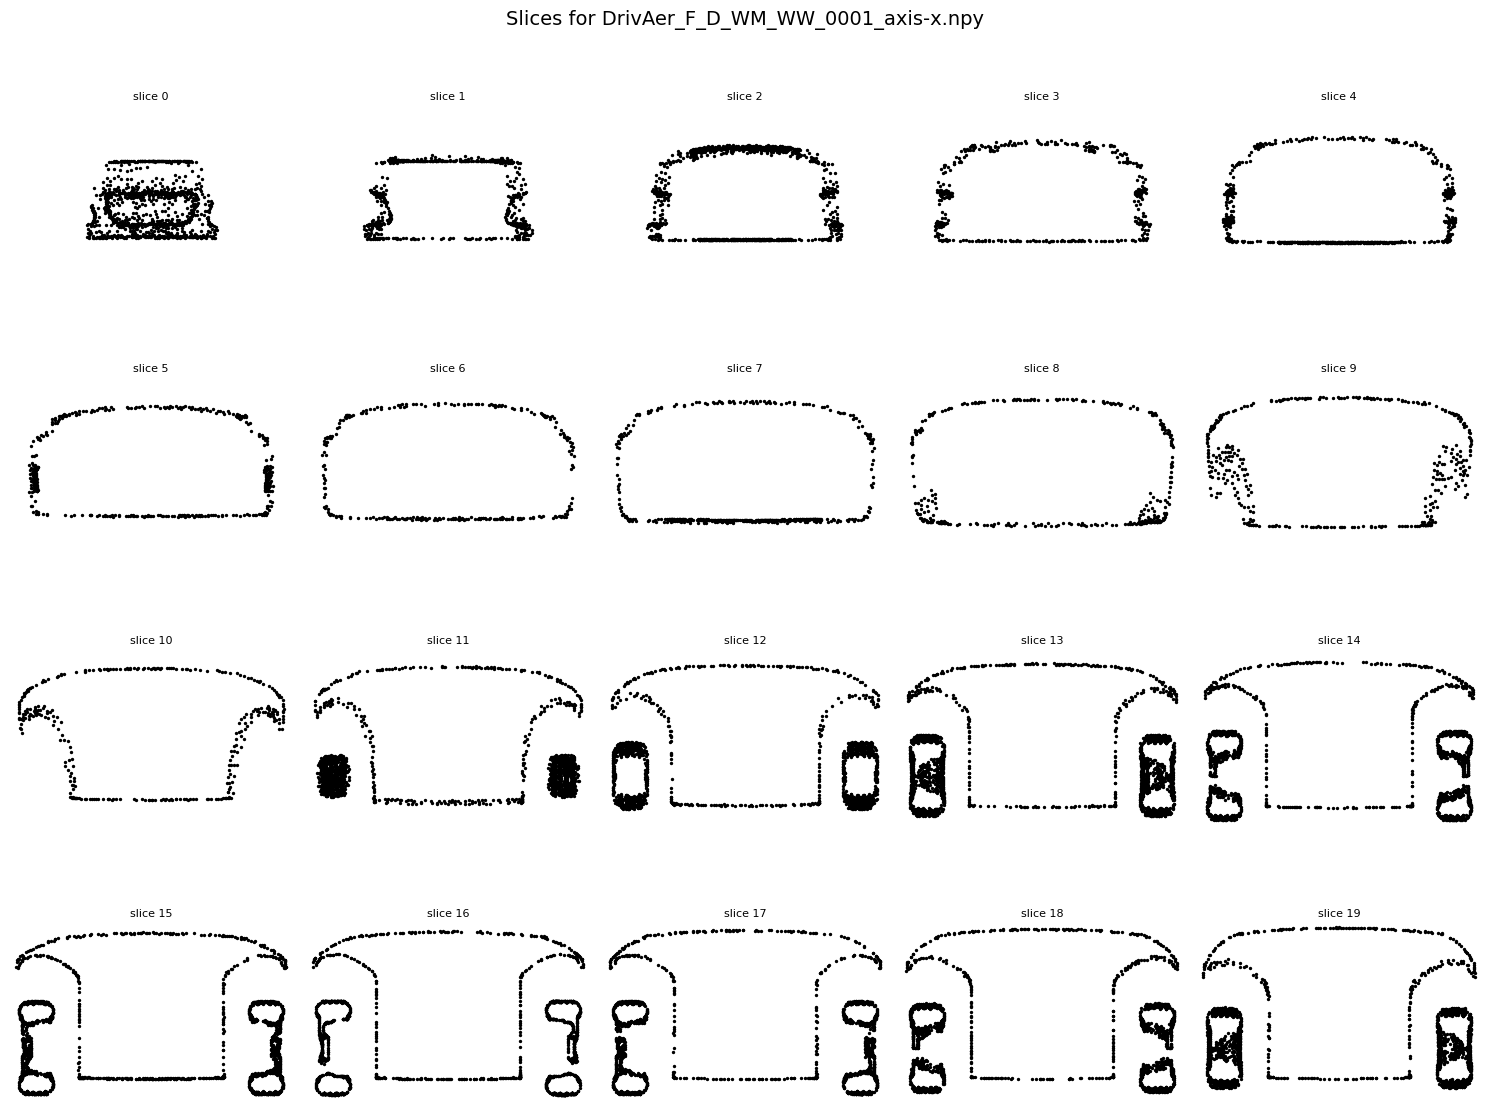

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

# --- 1. Copied the display_slices function directly into the cell ---
# This avoids any import issues.
def display_slices(
    slices,
    car_id=None,
    n_cols=5,
    limit=None,
    figsize=(15, 3),
    axis='x',
    save_path=None
):
    """
    Display or save 2D slices from a point cloud.
    slices: list of (Mi, 2) np arrays
    """
    if limit:
        slices = slices[:limit]

    # Handle case where all slices might be empty after limiting
    if not any(sl.size for sl in slices):
        print(f"No points to display for {car_id}.")
        return

    all_points = np.vstack([sl for sl in slices if sl.size])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()

    pad_x = 0.02 * (xmax - xmin)
    pad_y = 0.02 * (ymax - ymin)
    xmin, xmax = xmin - pad_x, xmax + pad_x
    ymin, ymax = ymin - pad_y, ymax + pad_y

    n = len(slices)
    n_rows = int(np.ceil(n / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    
    # Ensure axes is always an array for consistent indexing
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    
    for idx, sl in enumerate(slices):
        ax = axes.flat[idx]
        if sl.size:
            ax.scatter(sl[:, 0], sl[:, 1], s=2, c='k')
        else:
            ax.text(0.5, 0.5, 'Empty', ha='center', va='center')
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.set_aspect('equal', adjustable='box')
        ax.axis('off')
        ax.set_title(f"slice {idx}", fontsize=8)

    for j in range(idx + 1, n_rows * n_cols):
        axes.flat[j].axis('off')

    fig.suptitle(f"Slices for {car_id}" if car_id else "Point Cloud Slices", fontsize=14)
    plt.tight_layout()
    plt.show()

# --- 2. Set the correct relative path to your data ---
# From 'experiments', we need to go up two directories to the project root.
SLICE_DIR = "../../outputs/slices/"

# --- 3. Find and load an example slice file ---
try:
    example_file = sorted(os.listdir(SLICE_DIR))[0]
    example_path = os.path.join(SLICE_DIR, example_file)
    print(f"Loading and visualizing: {example_path}")
    
    car_slices = np.load(example_path, allow_pickle=True)

    # --- 4. Display the slices ---
    display_slices(car_slices, car_id=example_file, limit=20)

except (FileNotFoundError, IndexError):
    print(f"Error: Could not find any slice files in the '{SLICE_DIR}' directory.")
    print("Please ensure the path is correct relative to your notebook.")

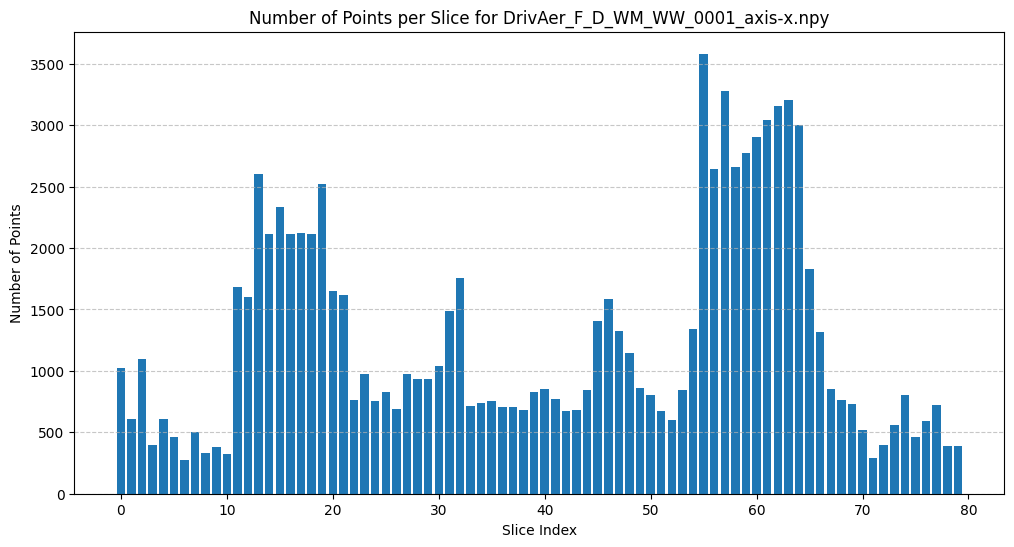

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt

# --- 1. Set the path to the same example file ---
SLICE_DIR = "../../outputs/slices/"
example_file = sorted(os.listdir(SLICE_DIR))[0]
example_path = os.path.join(SLICE_DIR, example_file)

# --- 2. Load the data ---
car_slices = np.load(example_path, allow_pickle=True)

# --- 3. Calculate the number of points in each slice ---
# Each 'sl' in car_slices is a numpy array of shape (N, 2).
# sl.shape[0] gives us N, the number of points.
num_points_per_slice = [sl.shape[0] for sl in car_slices]

# --- 4. Plot the histogram ---
plt.figure(figsize=(12, 6))
plt.bar(range(len(num_points_per_slice)), num_points_per_slice)
plt.title(f'Number of Points per Slice for {example_file}')
plt.xlabel('Slice Index')
plt.ylabel('Number of Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

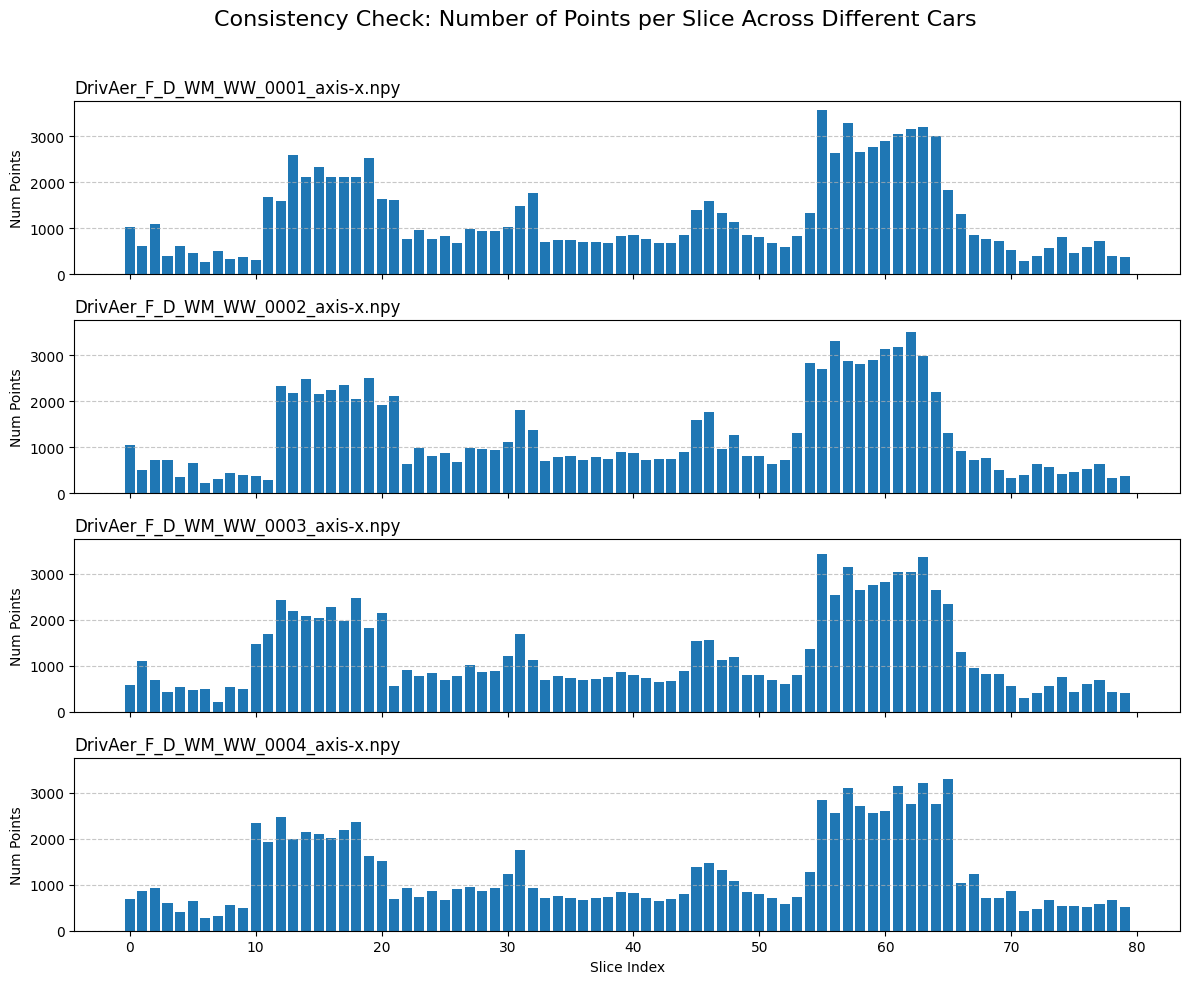

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt

# --- 1. Set the path to your data ---
SLICE_DIR = "../../outputs/slices/"

# --- 2. Find a few example slice files to load ---
try:
    all_files = sorted(os.listdir(SLICE_DIR))
    example_files = all_files[:4] # Let's inspect the first 4 cars
    
    # --- 3. Create subplots to show all histograms ---
    fig, axes = plt.subplots(len(example_files), 1, figsize=(12, 10), sharex=True, sharey=True)
    fig.suptitle("Consistency Check: Number of Points per Slice Across Different Cars", fontsize=16)

    for i, file_name in enumerate(example_files):
        example_path = os.path.join(SLICE_DIR, file_name)
        
        # Load the data
        car_slices = np.load(example_path, allow_pickle=True)
        
        # Calculate the number of points in each slice
        num_points_per_slice = [sl.shape[0] for sl in car_slices]
        
        # Plot the bar chart on the appropriate subplot
        ax = axes[i]
        ax.bar(range(len(num_points_per_slice)), num_points_per_slice)
        ax.set_title(file_name, loc='left')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_ylabel('Num Points')

    plt.xlabel('Slice Index')
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
    plt.show()

except (FileNotFoundError, IndexError):
    print(f"Error: Could not find enough slice files in the '{SLICE_DIR}' directory.")